In [112]:
%reset

In [15]:
import xarray as xr
import geopandas as gpd
from pyprojroot import here
import pandas as pd
import numpy as np

,cell_id,region,geometry
0,0003f387-71c4-48f6-b2b0-d853bd4f0aba,sierras,"POLYGON ((-118.71895 37.07419, -118.71895 37.0..."
1,000617d8-8c14-43e2-b708-7e3a69fe3cc3,central rockies,"POLYGON ((-107.07679 37.78042, -107.07679 37.7..."
2,000863e7-21e6-477d-b799-f5675c348627,other,"POLYGON ((-119.40167 37.02400, -119.40167 37.0..."
3,000ba8d9-d6d5-48da-84a2-1fa54951fae1,sierras,"POLYGON ((-119.32082 37.43171, -119.32082 37.4..."
4,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,sierras,"POLYGON ((-118.52132 36.65735, -118.52132 36.6..."
...,...,...,...
18125,ffdfb5a4-91a0-41a9-a4d5-501b04ef6326,sierras,"POLYGON ((-118.62014 37.11718, -118.62014 37.1..."
18126,ffe43514-2c92-43b6-bd84-d183806aca65,other,"POLYGON ((-123.49799 47.90132, -123.49799 47.9..."
18127,ffeabc13-7c6f-4b63-b043-19c8f15e0345,sierras,"POLYGON ((-119.64422 37.87976, -119.64422 37.8..."
18128,fff95195-ccc9-40b7-b302-a0d8570c86bc,other,"POLYGON ((-123.37223 47.73242, -123.37223 47.7..."


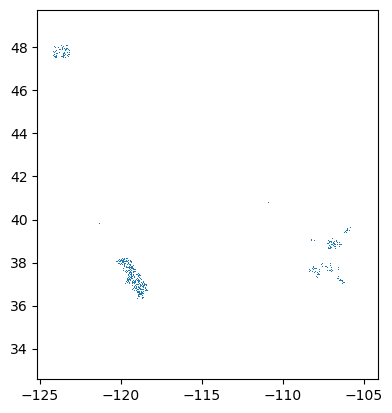

In [16]:
#get grid geometry
df_grid = gpd.read_file(here('./data/raw/grid_cells.geojson'))
df_grid['geometry']
df_grid.plot()
df_grid


In [17]:
path_ua = '/Users/nicoleta/Desktop/data/UA_SWE/'
files_ua = path_ua + '4km_SWE_Depth*.nc'
ds_ua = xr.open_mfdataset(files_ua)

In [18]:
ds_ua

<xarray.Dataset>
Dimensions:   (time: 3287, lat: 621, lon: 1405, time_str_len: 11)
Coordinates:
  * lat       (lat) float32 24.08 24.12 24.17 24.21 ... 49.79 49.83 49.88 49.92
  * lon       (lon) float32 -125.0 -125.0 -124.9 -124.9 ... -66.58 -66.54 -66.5
  * time      (time) datetime64[ns] 2012-10-01 2012-10-02 ... 2021-09-30
Dimensions without coordinates: time_str_len
Data variables:
    crs       (time) |S1 b'' b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
    time_str  (time_str_len, time) |S1 dask.array<chunksize=(11, 365), meta=np.ndarray>
    SWE       (time, lat, lon) float32 dask.array<chunksize=(365, 621, 1405), meta=np.ndarray>
    DEPTH     (time, lat, lon) float32 dask.array<chunksize=(365, 621, 1405), meta=np.ndarray>

In [4]:
#get centroids frm the grid
centroids = np.vstack(df_grid.geometry.centroid).T
lon_grid = centroids[0:1].ravel().tolist()
lat_grid = centroids[1:2].ravel().tolist()

/var/folders/cj/b1yrjqfd1kj1xd6tryxsg1_r0000gn/T/ipykernel_49736/653600328.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = np.vstack(df_grid.geometry.centroid).T
<__array_function__ internals>:180: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.


In [5]:
grid_labels = df_grid['cell_id'].to_numpy()

In [6]:
grid_labels = grid_labels.ravel().tolist()


In [7]:
dataUA_grid  = ds_ua.sel(lon = lon_grid, lat = lat_grid, method='nearest')
#dataUA_grid.SWE.sel(time = '2016-02-02').plot()


/opt/homebrew/Caskroom/miniforge/base/envs/compare_swe/lib/python3.9/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [8]:
dataUA_grid_label = dataUA_grid.assign_coords(label = grid_labels)

In [9]:
dataUA_grid_label

<xarray.Dataset>
Dimensions:   (time: 3287, lat: 18130, lon: 18130, time_str_len: 11,
               label: 18130)
Coordinates:
  * lat       (lat) float32 37.08 37.79 37.04 37.42 ... 47.92 37.88 47.75 47.54
  * lon       (lon) float32 -118.7 -107.1 -119.4 -119.3 ... -119.7 -123.4 -123.8
  * time      (time) datetime64[ns] 2012-10-01 2012-10-02 ... 2021-09-30
  * label     (label) <U36 '0003f387-71c4-48f6-b2b0-d853bd4f0aba' ... 'fffb4d...
Dimensions without coordinates: time_str_len
Data variables:
    crs       (time) |S1 b'' b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
    time_str  (time_str_len, time) |S1 dask.array<chunksize=(11, 365), meta=np.ndarray>
    SWE       (time, lat, lon) float32 dask.array<chunksize=(365, 18130, 18130), meta=np.ndarray>
    DEPTH     (time, lat, lon) float32 dask.array<chunksize=(365, 18130, 18130), meta=np.ndarray>

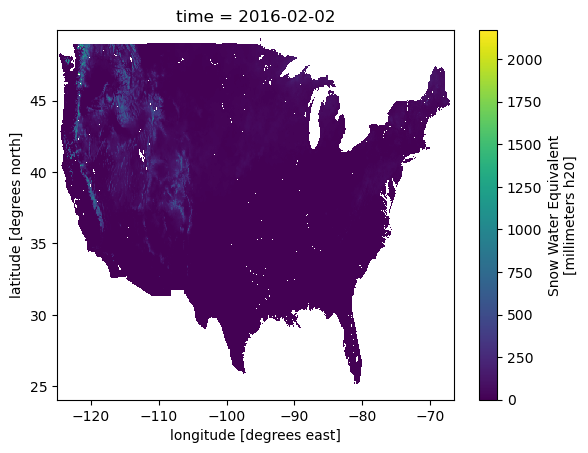

In [10]:
SWE_UA = ds_ua.SWE.sel(time = '2016-02-02')
im = SWE_UA.plot()

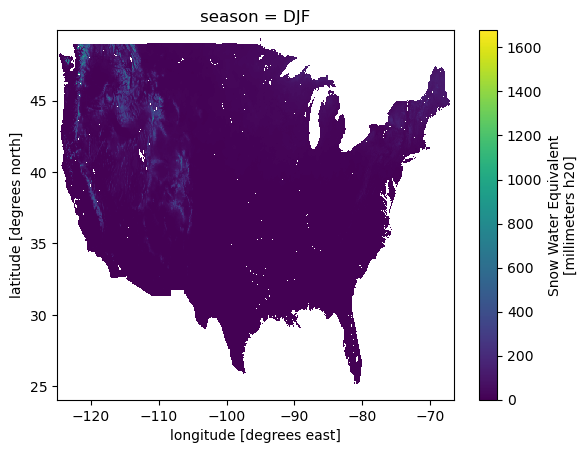

In [11]:
mean_season = ds_ua.groupby("time.season").mean('time')
#mean_SWE.plot()
t = mean_season["SWE"].sel(season= 'DJF')
t.plot()

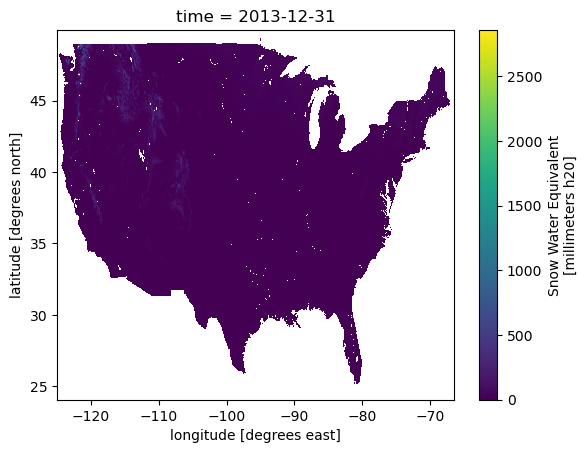

In [12]:
#plot annual, but maybe not that relevant for SWE
annual = ds_ua.resample(time="1Y").mean()
year_to_plot = annual.time[1]
annual.SWE.sel(time = year_to_plot).plot()

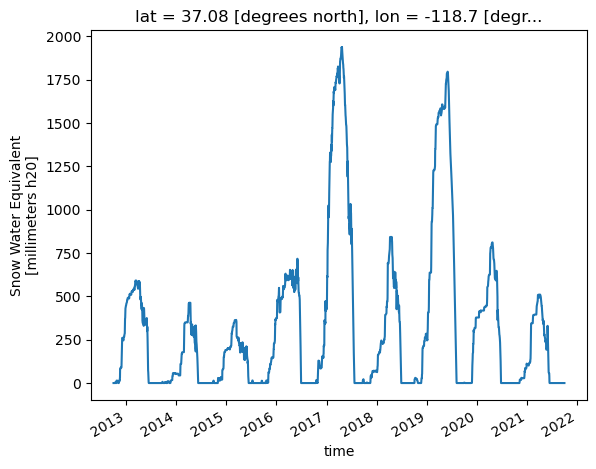

In [13]:
dataUA_point  = ds_ua.sel(lon = -118.708336, lat = 37.083332, method='nearest')
dataUA_point['SWE'].plot()

In [14]:
df_list = list()
#def sample_at_points(lat_grid, lon_grid):
for (i, j, k) in zip(lon_grid[0:5], lat_grid[0:5], grid_labels[0:5]):
    df = pd.DataFrame(columns = ['date',  'SWE_UA', 'Depth_UA','latitude', 'longitude','label'])
    dataUA_point  = ds_ua.sel(lon = i , lat = j, method='nearest')
    df['date'] = dataUA_point.time.values
    #df['cell_id'] = current_cell_id
    df['longitude'] = i #dataUA_point.lon_grid.values
    df['latitude'] = j #dataUA_point.lat_grid.values
    df['SWE_UA'] = dataUA_point.SWE.values
    df['Depth_UA'] = dataUA_point.DEPTH.values
    df['label'] = k
    #print(df)
    df_list.append(df)
    df_ua = pd.concat(df_list)

df_ua#df_ua.to_csv('single_csv_file.csv')

,date,SWE_UA,Depth_UA,latitude,longitude,label
0,2012-10-01,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba
1,2012-10-02,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba
2,2012-10-03,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba
3,2012-10-04,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba
4,2012-10-05,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba
...,...,...,...,...,...,...
3282,2021-09-26,0.0,0.0,36.660957,-118.525815,00146204-d4e9-4cd8-8f86-d1ef133c5b6d
3283,2021-09-27,0.0,0.0,36.660957,-118.525815,00146204-d4e9-4cd8-8f86-d1ef133c5b6d
3284,2021-09-28,0.0,0.0,36.660957,-118.525815,00146204-d4e9-4cd8-8f86-d1ef133c5b6d
3285,2021-09-29,0.0,0.0,36.660957,-118.525815,00146204-d4e9-4cd8-8f86-d1ef133c5b6d


In [111]:
#ds_ua = df_ua.to_xarray()
